<a href="https://colab.research.google.com/github/hongwon2/Python-Practice/blob/main/%EC%82%AC%EA%B8%B0%EA%B5%AC%EB%A7%A4_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#새로운 사용자의 첫번째 거래가불법적일 확률을 예측하는
#기계학습 모델 구축

Electronica 전자제품 판매 사이트에서 제공된 데이터

- Fraud_Data : 유저의 첫번재 트렌젝션 정보 데이터
  - user_id : 유저 아이디
  - signup_time : 계정생성시간
  - purchase_time : 구매시간
  - device_id : 디바이스 아이디
  - source : 유저가 들어온 경로
  - browser : 유저가 사용한 브라우저
  - sex : 성별
  - age : 나이
  - ip_address : 아이피 주소
  - class : 사기 여부(사기일 경우 1, 아닐경우 0)
-IpAdddress_to_Country : 나라별 아이피 주소를 범위로 구분한 데이터
  - lower_bounded_ip_address : 나라별 아이피 주소 범위의 하위값
  - upper_bounded_ip_address : 나라별 아이피 주소 범위의 상위값
  - country : 나라 이름

#데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/유통판매 데이터분석

/content/drive/MyDrive/Colab Notebooks/유통판매 데이터분석


In [3]:
import pandas as pd
data = pd.read_csv('Fraud_Data.csv')

In [4]:
data.shape

(151112, 11)

In [5]:
data.head(5)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [6]:
ip = pd.read_csv('IpAddress_to_Country.csv')

In [7]:
ip.shape

(138846, 3)

In [8]:
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


#데이터 탐색

In [9]:
data['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

In [10]:
print('Fraud% : ',len(data[data['class']==1])/len(data)*100,'%')

Fraud% :  9.364577267192546 %


In [11]:
data.signup_time.nunique()

151112

In [12]:
print('min_signup : ',min(data.signup_time))
print('max_signup : ',max(data.signup_time))
print('min_purchase : ',min(data.purchase_time))
print('max_purchase : ',max(data.purchase_time))

min_signup :  2015-01-01 00:00:42
max_signup :  2015-08-18 04:40:29
min_purchase :  2015-01-01 00:00:44
max_purchase :  2015-12-16 02:56:05


In [13]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [14]:
#데이터 병합
data['p_mth'] = pd.to_datetime(data['purchase_time']).dt.month
data['s_mth'] = pd.to_datetime(data['signup_time']).dt.month

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: p_mth, dtype: object

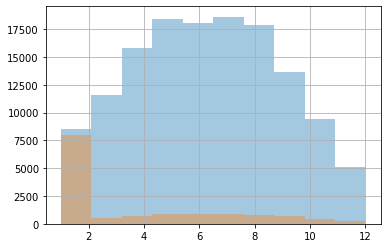

In [15]:
#구매시간 히스토그램
data.groupby('class').p_mth.hist(alpha = 0.4)
#사기 구매일 경우 가입 하자마자 구매 한 경우가 많음

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: s_mth, dtype: object

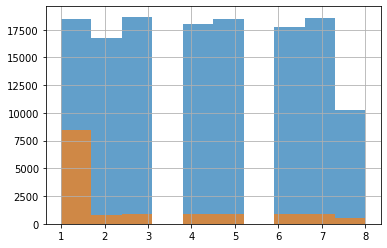

In [16]:
data.groupby('class').s_mth.hist(alpha = 0.7)
#1월 가입 자 중 사기꾼이 많음

In [17]:
data['s_week'] = pd.to_datetime(data['signup_time']).dt.isocalendar().week #isocalendar() : datetime의 연도,연도의 몇번째 주차인지,주차의 몇번째 날짜인지 알려줌
data['p_week'] = pd.to_datetime(data['purchase_time']).dt.isocalendar().week

<AxesSubplot:xlabel='s_week'>

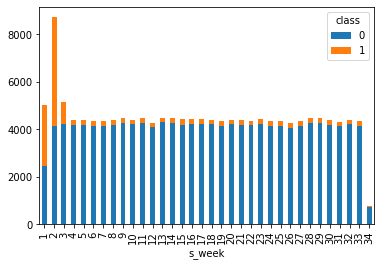

In [18]:
data.groupby(['s_week','class']).size().unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='p_week'>

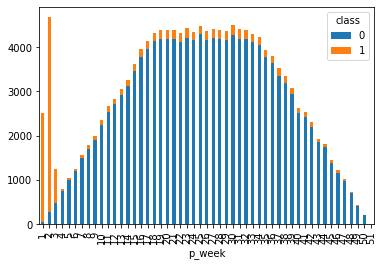

In [19]:
data.groupby(['p_week','class']).size().unstack().plot.bar(stacked = True)

In [20]:
data['s_day'] = pd.to_datetime(data['signup_time']).dt.dayofweek #daypfweek : 일요일 : 1 ~ 토요일 : 7
data['p_day'] = pd.to_datetime(data['purchase_time']).dt.dayofweek

<AxesSubplot:xlabel='s_day'>

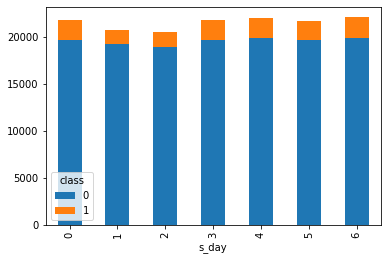

In [21]:
data.groupby(['s_day','class']).size().unstack().plot.bar(stacked = True)

<AxesSubplot:xlabel='p_day'>

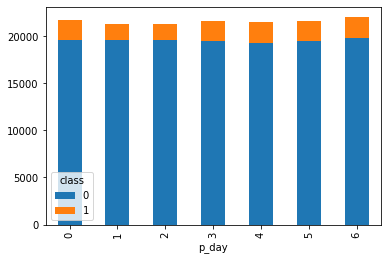

In [22]:
data.groupby(['p_day','class']).size().unstack().plot.bar(stacked = True)

In [23]:
#구매시간과 가입시간의 차이를 확인해보자
data['dt'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).astype('timedelta64[D]') #넘파이 날짜형 D- 일 까지 다 보여줌

class
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: dt, dtype: object

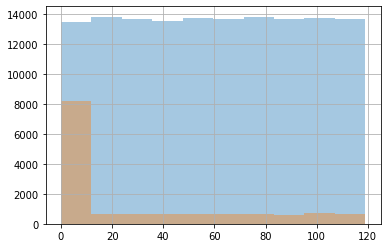

In [24]:
data.groupby('class').dt.hist(alpha = 0.4)

In [25]:
#dt가 0(구매날짜와 가입 날짜의 차가 없는 경우)
data[data.dt == 0 ]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,p_mth,s_mth,s_week,p_week,s_day,p_day,dt
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,6,6,23,24,6,0,0.0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,1,1,1,3,3,0.0
24,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1,1,1,2,2,6,6,0.0
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1,1,1,2,2,2,2,0.0
64,181004,2015-01-07 17:45:16,2015-01-07 17:45:17,10,WETYPHOQVLWMK,Ads,FireFox,M,36,2.293333e+09,1,1,1,2,2,2,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151036,330098,2015-01-03 12:52:15,2015-01-03 12:52:16,38,EZENSUHMPLOIW,Ads,Chrome,M,27,2.152700e+08,1,1,1,1,1,5,5,0.0
151082,305464,2015-01-07 09:06:55,2015-01-07 09:06:56,90,TVYSUZLTILQQN,SEO,IE,M,34,3.067794e+09,1,1,1,2,2,2,2,0.0
151099,115473,2015-01-01 07:26:14,2015-01-01 07:26:15,61,ZRHCEVZHNIBJH,Direct,IE,M,24,3.003296e+09,1,1,1,1,1,3,3,0.0
151103,5557,2015-01-04 23:03:04,2015-01-04 23:03:05,27,AWFGZTEHXMWEJ,Direct,Chrome,M,39,3.306999e+09,1,1,1,1,1,6,6,0.0


<AxesSubplot:title={'center':'purchase_value'}, xlabel='class'>

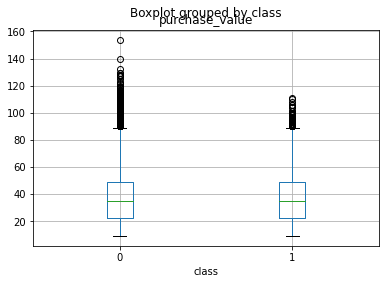

In [26]:
#구매 가격
data.boxplot(by = 'class',column = ['purchase_value'],grid = True)

<AxesSubplot:title={'center':'age'}, xlabel='class'>

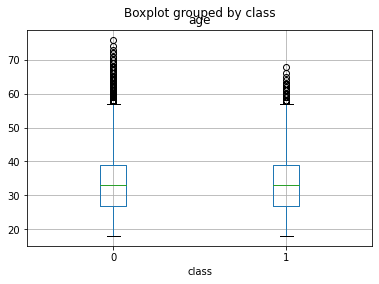

In [27]:
#나이
data.boxplot(by = 'class',column = ['age'],grid = True)

In [28]:
#디바이스 아이디 # ex)20명이 동일한 아이패드7세대(kipfscnugoldp)를 이용해 구매함 
data[['user_id','device_id']].groupby('device_id').count().sort_values(by = 'user_id',ascending = False)

,user_id
device_id,
KIPFSCNUGOLDP,20
NGQCKIADMZORL,20
CQTUVBYIWWWBC,20
ITUMJCKWEYNDD,20
EQYVNEGOFLAWK,20
...,...
IXVBQLPWSAIDA,1
IXUYCZZVDXGPO,1
IXUWTGATQJEVG,1


In [29]:
device_count=data[['user_id','device_id']].groupby('device_id').count().reset_index()

In [30]:
device_count = device_count.rename(columns = {'user_id':'d_ct'})

In [31]:
data = data.merge(device_count,how = 'left',on = 'device_id')

In [32]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,p_mth,s_mth,s_week,p_week,s_day,p_day,dt,d_ct
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4,2,9,16,1,5,52.0,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,6,6,23,24,6,0,0.0,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,1,1,1,3,3,0.0,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5,4,18,19,1,0,5.0,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,9,7,30,37,1,2,50.0,1


In [33]:
t1 = data.groupby(['class','d_ct']).size().to_frame('size').reset_index().sort_values(['class','d_ct'],ascending = False)
t1

,class,d_ct,size
39,1,20,114
38,1,19,90
37,1,18,169
36,1,17,207
35,1,16,538
34,1,15,568
33,1,14,740
32,1,13,767
31,1,12,992
30,1,11,1009


In [34]:
t1.pivot_table(index = 'd_ct',columns = 'class',values = 'size').sort_values(('d_ct'),ascending = False)
 #사기 거래 일수록 같은 디바이스를 쓴다 

class,0,1
d_ct,,
20,6,114
19,5,90
18,11,169
17,14,207
16,38,538
15,47,568
14,58,740
13,65,767
12,88,992


In [35]:
pd.set_option('max_rows',10)

In [36]:
ip_count = data[['user_id','ip_address']].groupby('ip_address').count().reset_index()
ip_count = ip_count.rename(columns = {'user_id':'ip_ct'})
data = data.merge(ip_count,how = 'left',on = 'ip_address')

In [37]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,p_mth,s_mth,s_week,p_week,s_day,p_day,dt,d_ct,ip_ct
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4,2,9,16,1,5,52.0,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,6,6,23,24,6,0,0.0,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,1,1,1,3,3,0.0,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5,4,18,19,1,0,5.0,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,9,7,30,37,1,2,50.0,1,1


In [38]:
#ip_address
data[['user_id','ip_address']].groupby('ip_address').count().sort_values(by = 'user_id',ascending = False)

,user_id
ip_address,
1.502818e+09,20
5.760609e+08,20
3.874758e+09,20
2.050964e+09,20
2.937899e+09,19
...,...
1.427304e+09,1
1.427303e+09,1
1.427285e+09,1


In [39]:
t2 = data.groupby(['class','ip_ct']).size().to_frame('size').reset_index().sort_values(['class','ip_ct'],ascending = False)
t2.pivot_table(index = 'ip_ct',columns = 'class',values = 'size').sort_values(('ip_ct'),ascending = False) 
#사기거래일수록 같은 ip를 공유해서 쓴다

class,0,1
ip_ct,,
20,4,76
19,6,127
18,9,153
17,12,192
16,35,541
...,...,...
5,13,52
4,3,13
3,2,4


In [40]:
#source
data.source.value_counts()

SEO       60615
Ads       59881
Direct    30616
Name: source, dtype: int64

<AxesSubplot:xlabel='source'>

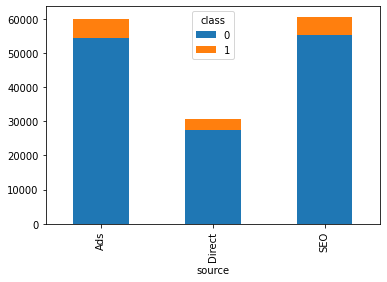

In [41]:
data.groupby(['source','class']).size().unstack().plot(kind = 'bar',stacked = True)

In [42]:
#브라우저
data.browser.value_counts()

Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: browser, dtype: int64

<AxesSubplot:xlabel='browser'>

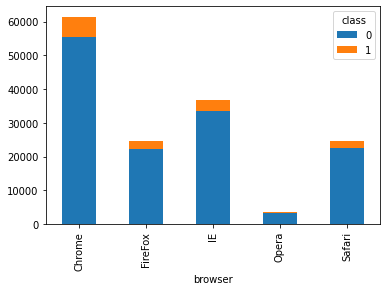

In [43]:
data.groupby(['browser','class']).size().unstack().plot(kind = 'bar',stacked = True)

In [44]:
#sex
data.sex.value_counts()

M    88293
F    62819
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex'>

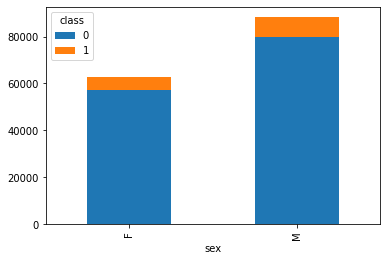

In [45]:
data.groupby(['sex','class']).size().unstack().plot(kind = 'bar',stacked = True)

In [46]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,p_mth,s_mth,s_week,p_week,s_day,p_day,dt,d_ct,ip_ct
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4,2,9,16,1,5,52.0,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,6,6,23,24,6,0,0.0,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,1,1,1,3,3,0.0,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5,4,18,19,1,0,5.0,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,9,7,30,37,1,2,50.0,1,1


In [48]:
pd.set_option('max_columns',25)

In [49]:
#ip address to country mapping
countries = []
for i in range(len(data)):
  ip_address = data.loc[i,'ip_address']
  tmp = ip[(ip['lower_bound_ip_address'] <= ip_address) & (ip['upper_bound_ip_address'] >= ip_address)]
  if len(tmp) == 1:
    countries.append(tmp['country'].values[0])
  else :
    countries.append('NA')
data['country'] = countries

In [50]:
data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,p_mth,s_mth,s_week,p_week,s_day,p_day,dt,d_ct,ip_ct,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,4,2,9,16,1,5,52.0,1,1,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,6,6,23,24,6,0,0.0,1,1,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,1,1,1,1,3,3,0.0,12,12,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,5,4,18,19,1,0,5.0,1,1,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,9,7,30,37,1,2,50.0,1,1,United States


In [51]:
pd.set_option('max_rows',10)
data['country'].value_counts()

United States     58049
NA                21966
China             12038
Japan              7306
United Kingdom     4490
                  ...  
Myanmar               1
Vanuatu               1
Dominica              1
Niger                 1
Guadeloupe            1
Name: country, Length: 182, dtype: int64

#2차시

In [52]:
df = data[['purchase_value','source','browser','sex','age','country','d_ct','class']]

In [53]:
df.head()

,purchase_value,source,browser,sex,age,country,d_ct,class
0,34,SEO,Chrome,M,39,Japan,1,0
1,16,Ads,Chrome,F,53,United States,1,0
2,15,SEO,Opera,M,53,United States,12,1
3,44,SEO,Safari,M,41,NA,1,0
4,39,Ads,Safari,M,45,United States,1,0


In [54]:
path = '/content/drive/MyDrive/Colab Notebooks/유통판매 데이터분석/output.csv'

with open(path,'w',encoding = 'utf-8-sig') as f:
  df.to_csv(f)

#Pycaret

In [55]:
import numpy as np
import pandas as pd

In [56]:
!pip install pycaret -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [57]:
!pip install markupsafe==2.0.1 -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [58]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [59]:
!pip install Jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
from pycaret.classification import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
%cd /content/drive/MyDrive/Colab Notebooks/유통판매 데이터분석

/content/drive/MyDrive/Colab Notebooks/유통판매 데이터분석


In [63]:
data = pd.read_csv('output.csv')

In [64]:
data.shape

(151112, 9)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      151112 non-null  int64 
 1   purchase_value  151112 non-null  int64 
 2   source          151112 non-null  object
 3   browser         151112 non-null  object
 4   sex             151112 non-null  object
 5   age             151112 non-null  int64 
 6   country         129146 non-null  object
 7   d_ct            151112 non-null  int64 
 8   class           151112 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 10.4+ MB


In [66]:
exp = setup(data,silent=True,target = 'class')

,Description,Value
0,session_id,8159
1,Target,class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(151112, 9)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [67]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9513,0.8402,0.5358,0.9085,0.6739,0.6495,0.6761,42.309
ridge,Ridge Classifier,0.9513,0.0000,0.5358,0.9085,0.6739,0.6495,0.6761,0.333
ada,Ada Boost Classifier,0.9513,0.8399,0.5359,0.9081,0.6739,0.6495,0.6760,7.285
gbc,Gradient Boosting Classifier,0.9513,0.8407,0.5358,0.9081,0.6738,0.6494,0.6759,30.702
lda,Linear Discriminant Analysis,0.9513,0.8403,0.5358,0.9079,0.6737,0.6493,0.6759,5.295
lightgbm,Light Gradient Boosting Machine,0.9512,0.8413,0.5366,0.9047,0.6735,0.6489,0.6750,1.060
xgboost,Extreme Gradient Boosting,0.9511,0.8418,0.5402,0.8992,0.6747,0.6501,0.6749,62.577
catboost,CatBoost Classifier,0.9510,0.8397,0.5394,0.8990,0.6741,0.6494,0.6743,25.449
knn,K Neighbors Classifier,0.9474,0.7945,0.5196,0.8669,0.6496,0.6231,0.6471,11.220
svm,SVM - Linear Kernel,0.9473,0.0000,0.5485,0.8729,0.6636,0.6369,0.6628,6.525


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=8159, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
model = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9504,0.8401,0.5186,0.9164,0.6624,0.6378,0.6680
1,0.9493,0.8419,0.5227,0.8933,0.6595,0.6341,0.6608
2,0.9524,0.8352,0.5498,0.9070,0.6846,0.6606,0.6849
3,0.9517,0.8437,0.5498,0.8951,0.6812,0.6567,0.6796
4,0.9524,0.8402,0.5473,0.9097,0.6834,0.6594,0.6843
5,0.9490,0.8402,0.5091,0.9068,0.6521,0.6268,0.6574
6,0.9501,0.8440,0.5231,0.9059,0.6633,0.6384,0.6666
7,0.9495,0.8372,0.5201,0.9007,0.6594,0.6343,0.6623
8,0.9523,0.8392,0.5559,0.8976,0.6866,0.6623,0.6846


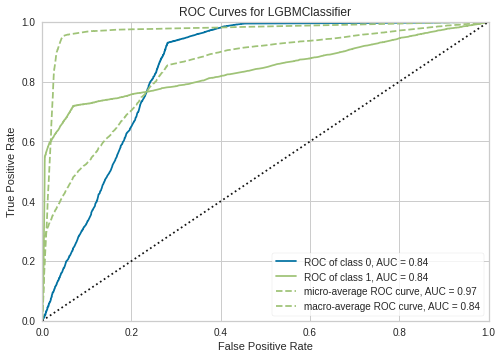

In [69]:
plot_model(model)

In [70]:
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9504,0.8311,0.5186,0.9164,0.6624,0.6378,0.6680
1,0.9492,0.8471,0.5206,0.8945,0.6582,0.6328,0.6599
2,0.9530,0.8466,0.5498,0.9161,0.6872,0.6635,0.6889
3,0.9521,0.8452,0.5498,0.9010,0.6829,0.6586,0.6822
4,0.9526,0.8371,0.5483,0.9129,0.6851,0.6612,0.6864
5,0.9492,0.8377,0.5091,0.9117,0.6533,0.6283,0.6595
6,0.9501,0.8555,0.5201,0.9102,0.6620,0.6372,0.6664
7,0.9496,0.8288,0.5181,0.9051,0.6590,0.6339,0.6628
8,0.9526,0.8379,0.5559,0.9020,0.6879,0.6638,0.6866


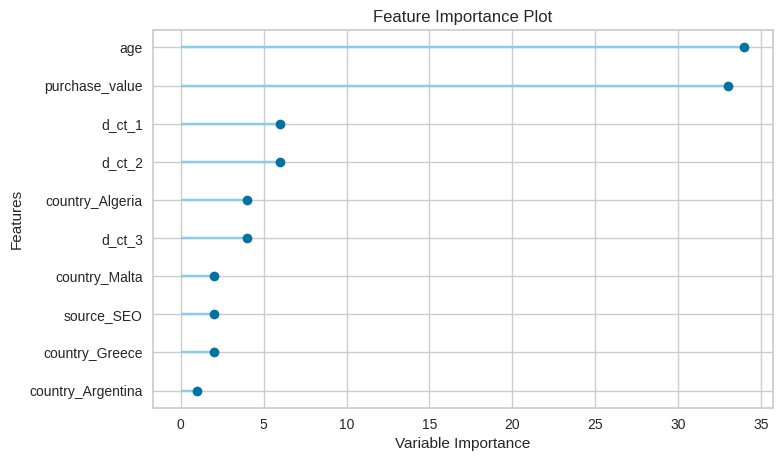

In [71]:
plot_model(tuned_model,plot='feature')